In [14]:
def find_max_abs(Z):
    ZZ = []
    for i in range(len(Z)):
        ZZ.append(abs(Z[i]))
    return max(ZZ)

#y = 1/(1+e^(kx+b))
def func(k, b, x):
    return 1/(1+np.exp(k*x+b))

In [47]:
def find_MSE(X, Y):

    x = np.array(X)
    y = np.array(Y)
    #начальный прогноз
    k1 = -1.0
    b1 = -1.0
    #y = 1/(1+e^(kx+b))
    
    #шаг
    alpha = 0.01
    #погрешность
    e = 1e-3
 
    vect= np.array([k1, b1])
    
    def df_dk(x_i, vect):
        return x_i*np.exp(vect[0]*x_i+vect[1])*(-func(vect[0], vect[1], x_i)**2)
    def df_db(x_i, vect):
        return np.exp(vect[0]*x_i+vect[1])*(-func(vect[0], vect[1], x_i)**2)
    def dMSE_df(x_i, y_i, vect):
        return func(vect[0], vect[1], x[i])-y[i]
    
    for i in range(len(x)):
        grad_MSE = np.array([0.0,0.0])
        grad_k = dMSE_df(x[i], y[i], vect) * df_dk(x[i], vect)
        grad_b = dMSE_df(x[i], y[i], vect) * df_db(x[i], vect)
        grad_MSE += 1/len(x)*np.array([grad_k, grad_b])
    vect = vect - 1*alpha*grad_MSE

    while(1*alpha*np.linalg.norm(grad_MSE) > e):  
        grad_MSE = np.array([0.0,0.0])
        for i in range(len(x)):
            grad_k = dMSE_df(x[i], y[i], vect) * df_dk(x[i], vect)
            grad_b = dMSE_df(x[i], y[i], vect) * df_db(x[i], vect)
            grad_MSE += 1/len(x)*np.array([grad_k, grad_b])
        vect = vect - 2*alpha*grad_MSE
    return vect

In [48]:
import matplotlib.pyplot as plt
def plot_MSE(f, X, Y):
    vect = f(X, Y)
    func_x = np.arange(min(X), max(X), (max(X)-min(X))/100)
    func_y = func(vect[0], vect[1], func_x)
    plt.scatter(X, Y, c='red')
    plt.plot(func_x,func_y,c='blue',label=r'$y = \frac{1}{1+e^{%(k).2fx+%(b).2f}}$'%{'k':vect[0], 'b':vect[1]})
    plt.title('$Mean \ squared \ error$')
    plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
    plt.grid()
    plt.show()

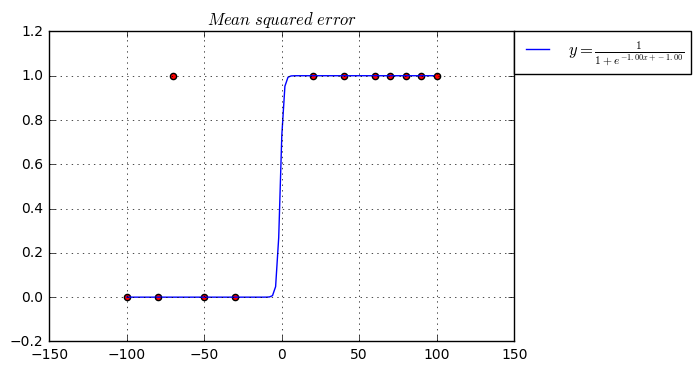

In [49]:
X = [-100,-80,-50,-30,60,20,40,90,70,80, -70,100]
Y = [0,0,0,0, 1,1,1,1,1,1,1,1]
plot_MSE(find_MSE, X, Y)
#plot_sigma(X,Y)